# Housing Prices EDA

## Import Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [59]:
df = pd.read_csv("data/train.csv")

In [60]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Exploratory Data Analysis

In [61]:
print(df.columns.values)
print("Features:", len(df.columns))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [62]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


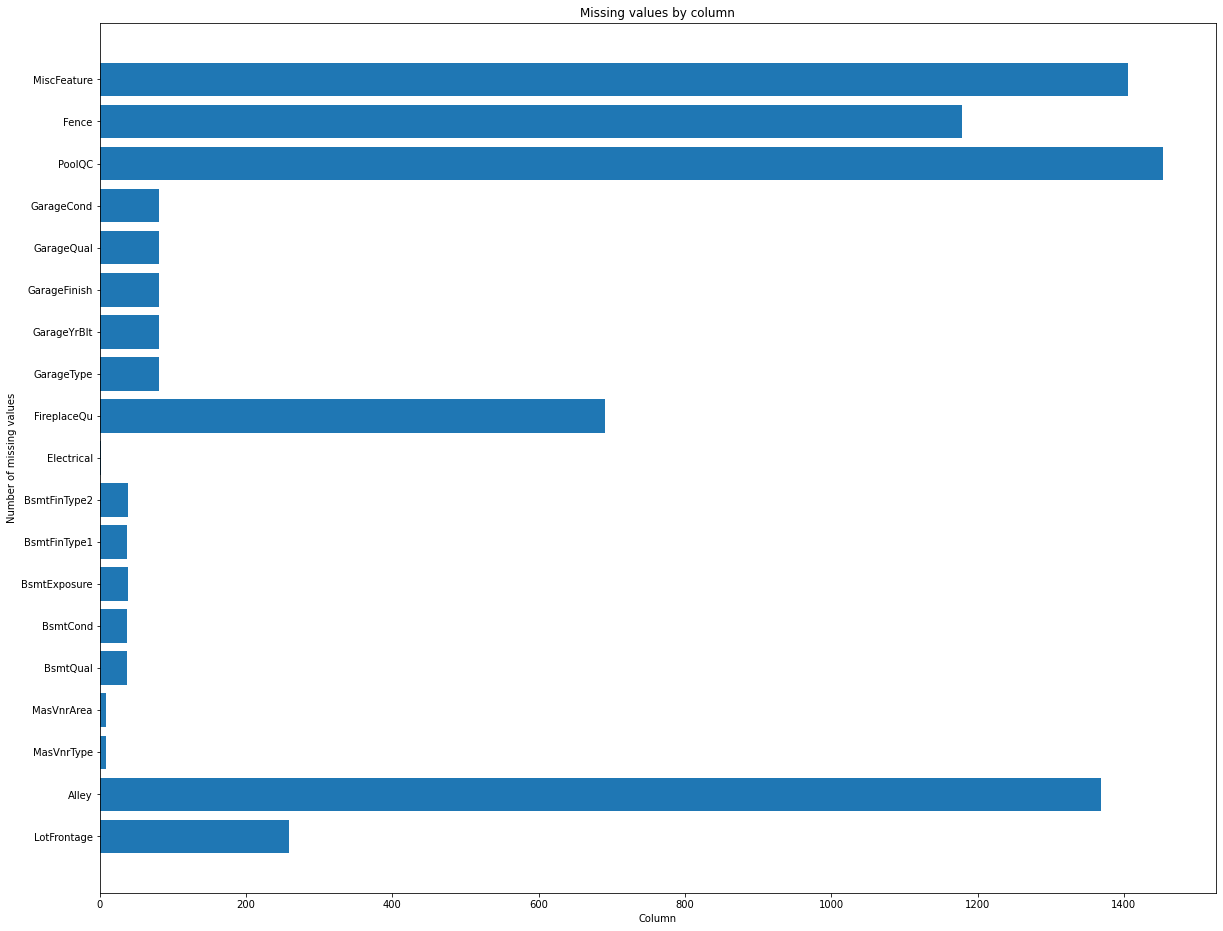

In [63]:
# Plot missing values
missing_values = df.isnull().sum(axis=0)
nan_cols = missing_values[missing_values > 0]
plt.figure(figsize=(20,16))
plt.barh(nan_cols.index, nan_cols.values)
plt.xlabel('Column')
plt.ylabel('Number of missing values')
plt.title('Missing values by column')
print(nan_cols)
plt.show()

In [64]:
cat_feat = df.select_dtypes(include='object')

cat_feat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [65]:
num_feat = df.select_dtypes(include="int")
num_feat = pd.concat([num_feat, df.select_dtypes(include="float")])

num_feat.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  3SsnPorch  \
0        2003.0       706.0         0.0      150.0  ...        0.0   
1        1976.0       978.0         0.0      284.0  ...        0.0   
2        2002.0       486.0         0.0      434.0  ...        0.0   
3        1970.0       216.0         0.0      540.0  ...        0.0   
4        2000.0       655.0         0.0      490.0  ...        0.0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  LotFrontage  \
0          0.0       0.0      0.0     2.0  2008.0   208500.0          NaN   
1          0.0       0.0      0.0     5.0  2007.0   181500.0          NaN   
2          0.0       0.0      0.0     9.0  2008.0   223500.0          NaN   
3          0.0       0.0      0.0     2.0  2006.0   140000.0          NaN   
4          0.0       0.0      0.0    12.0  2008.0   250000.0          NaN   

   MasVnrArea  GarageYrBlt  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 38 columns]

### Analyze Numerical Columns

In [66]:
num_feat.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
      dtype='object')

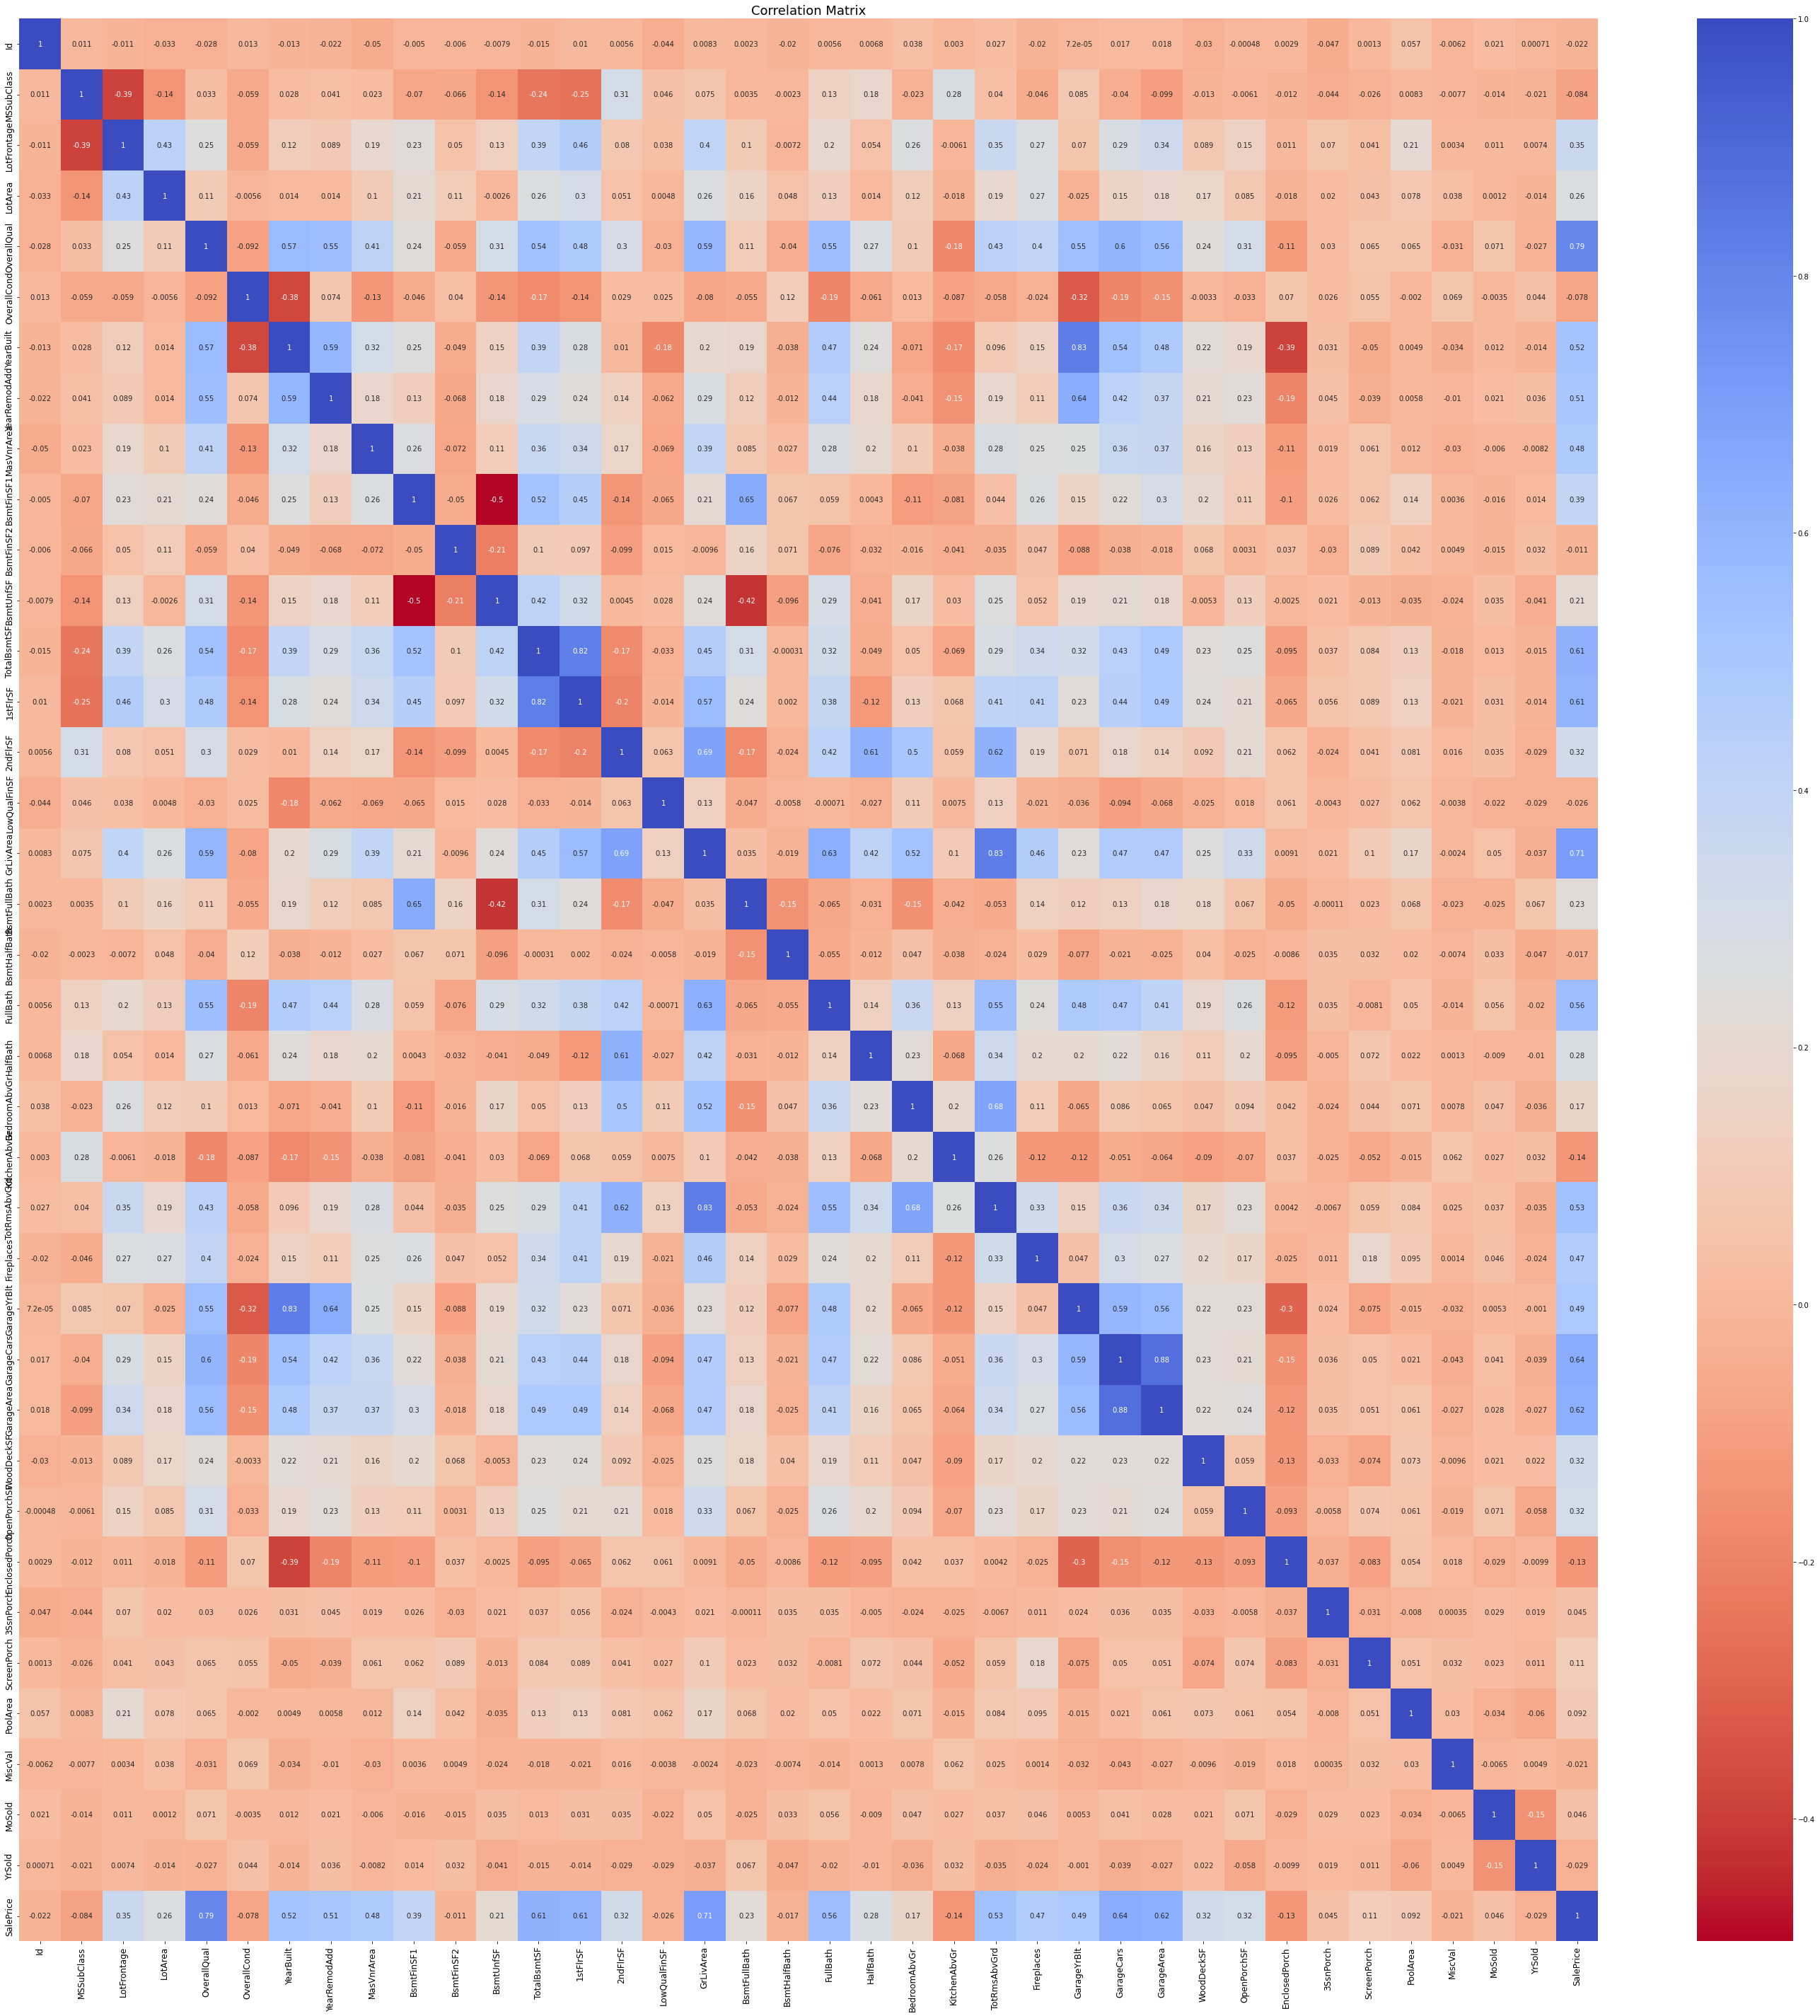

In [67]:
plt.figure(figsize = (50,50))
plt.title("Correlation Matrix", fontsize = 18)
sns.heatmap(df.corr(numeric_only=True), cmap = 'coolwarm_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.show()

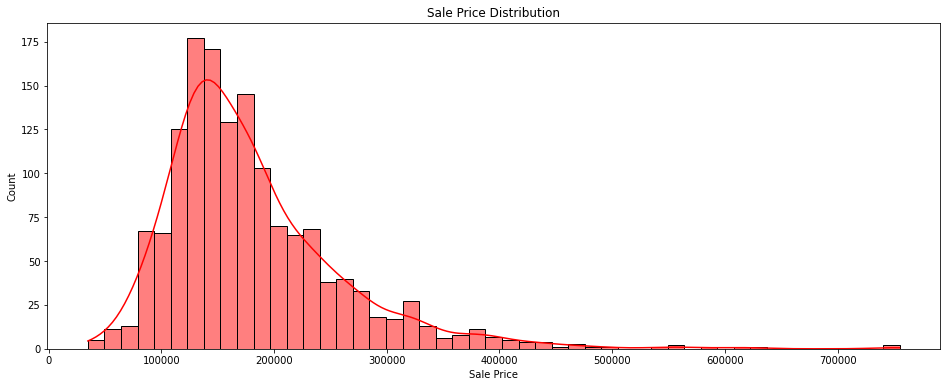

In [68]:
# Examine distribution of Sale Price
plt.figure(figsize=(16,6))
sns.histplot(df['SalePrice'].values, color='r', kde=True)
plt.xlabel("Sale Price")
plt.title("Sale Price Distribution")
plt.show()

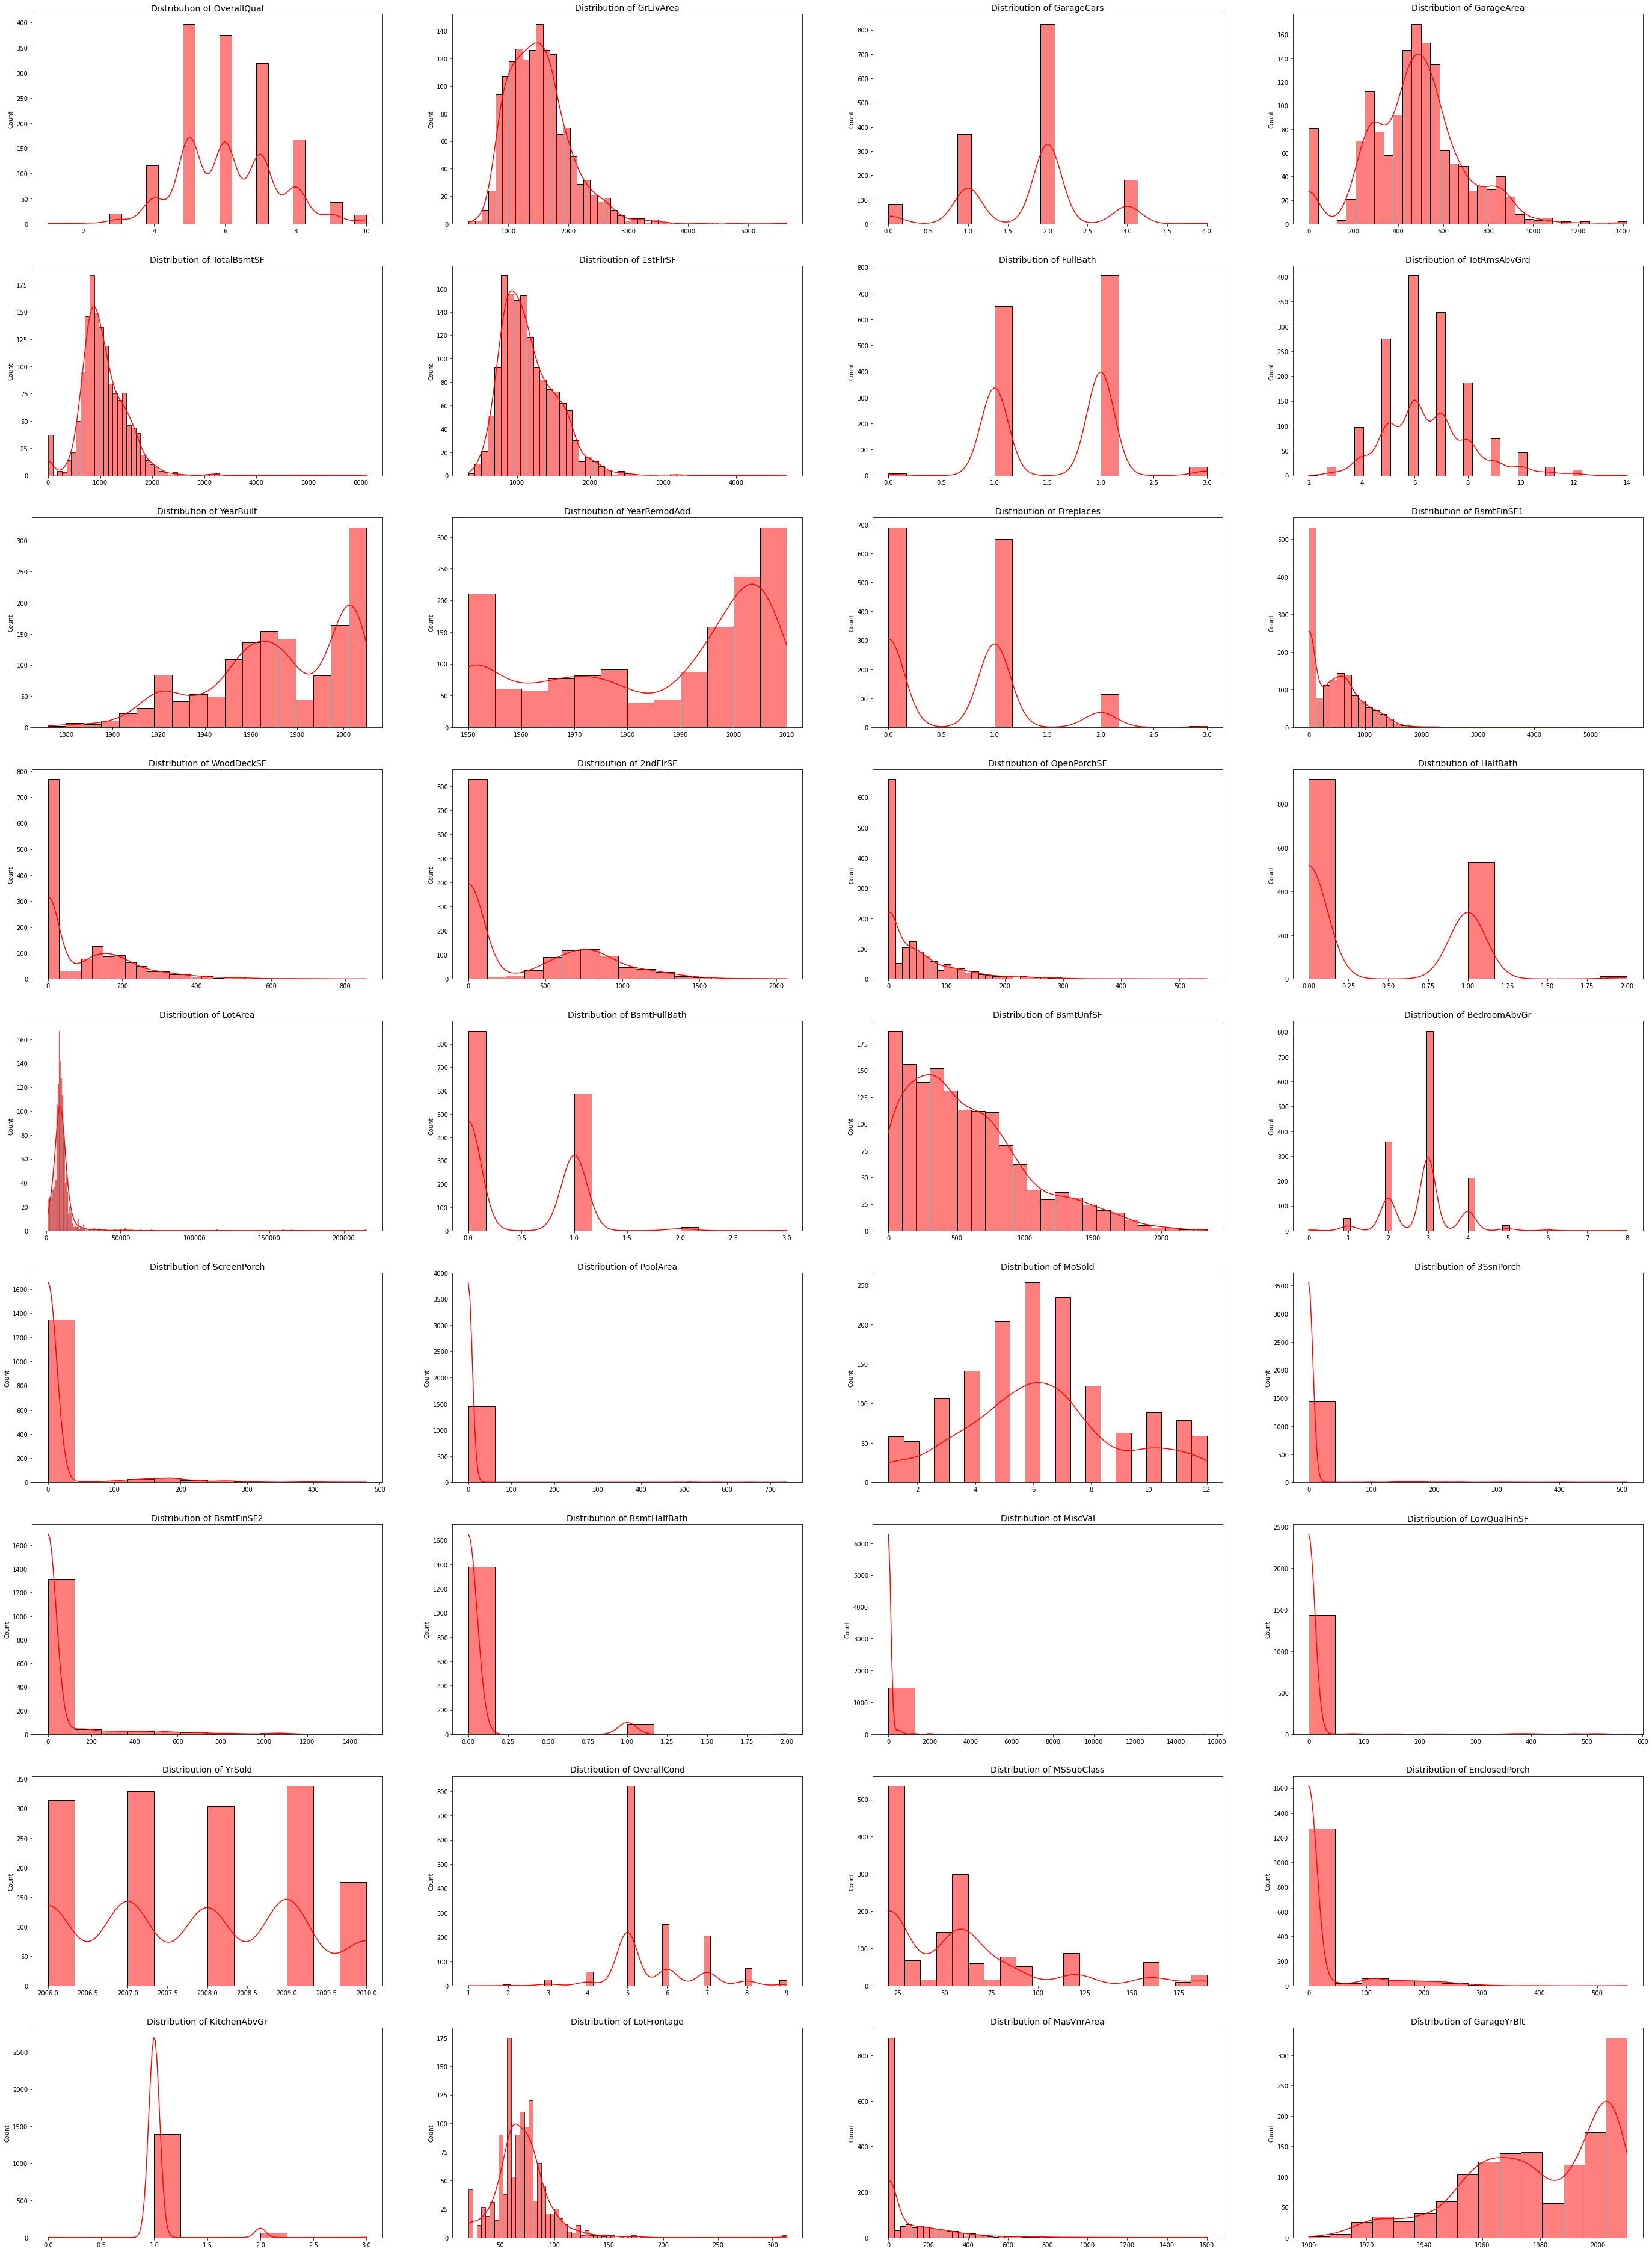

In [69]:
# Examine the distribution of each numerical columns sorted by its correlation to Sale Price
# ID not plotted
num_feat_plot = num_feat.drop(['Id'], axis=1, inplace=False)

# Get correlations
corr = num_feat_plot.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
corr_df = df.reindex(corr.index, axis=1).drop(['SalePrice'], axis=1, inplace=False)

# Create the subplot grid
fig, ax = plt.subplots(9, 4, figsize=(48, 68))

# Loop through the numerical columns
for i, col in enumerate(corr_df.columns):
    sns.histplot(corr_df[col].values, ax=ax[i // 4][i % 4], color='r', kde=True)
    ax[i // 4][i % 4].set_title(f'Distribution of {col}', fontsize=14)

plt.show()

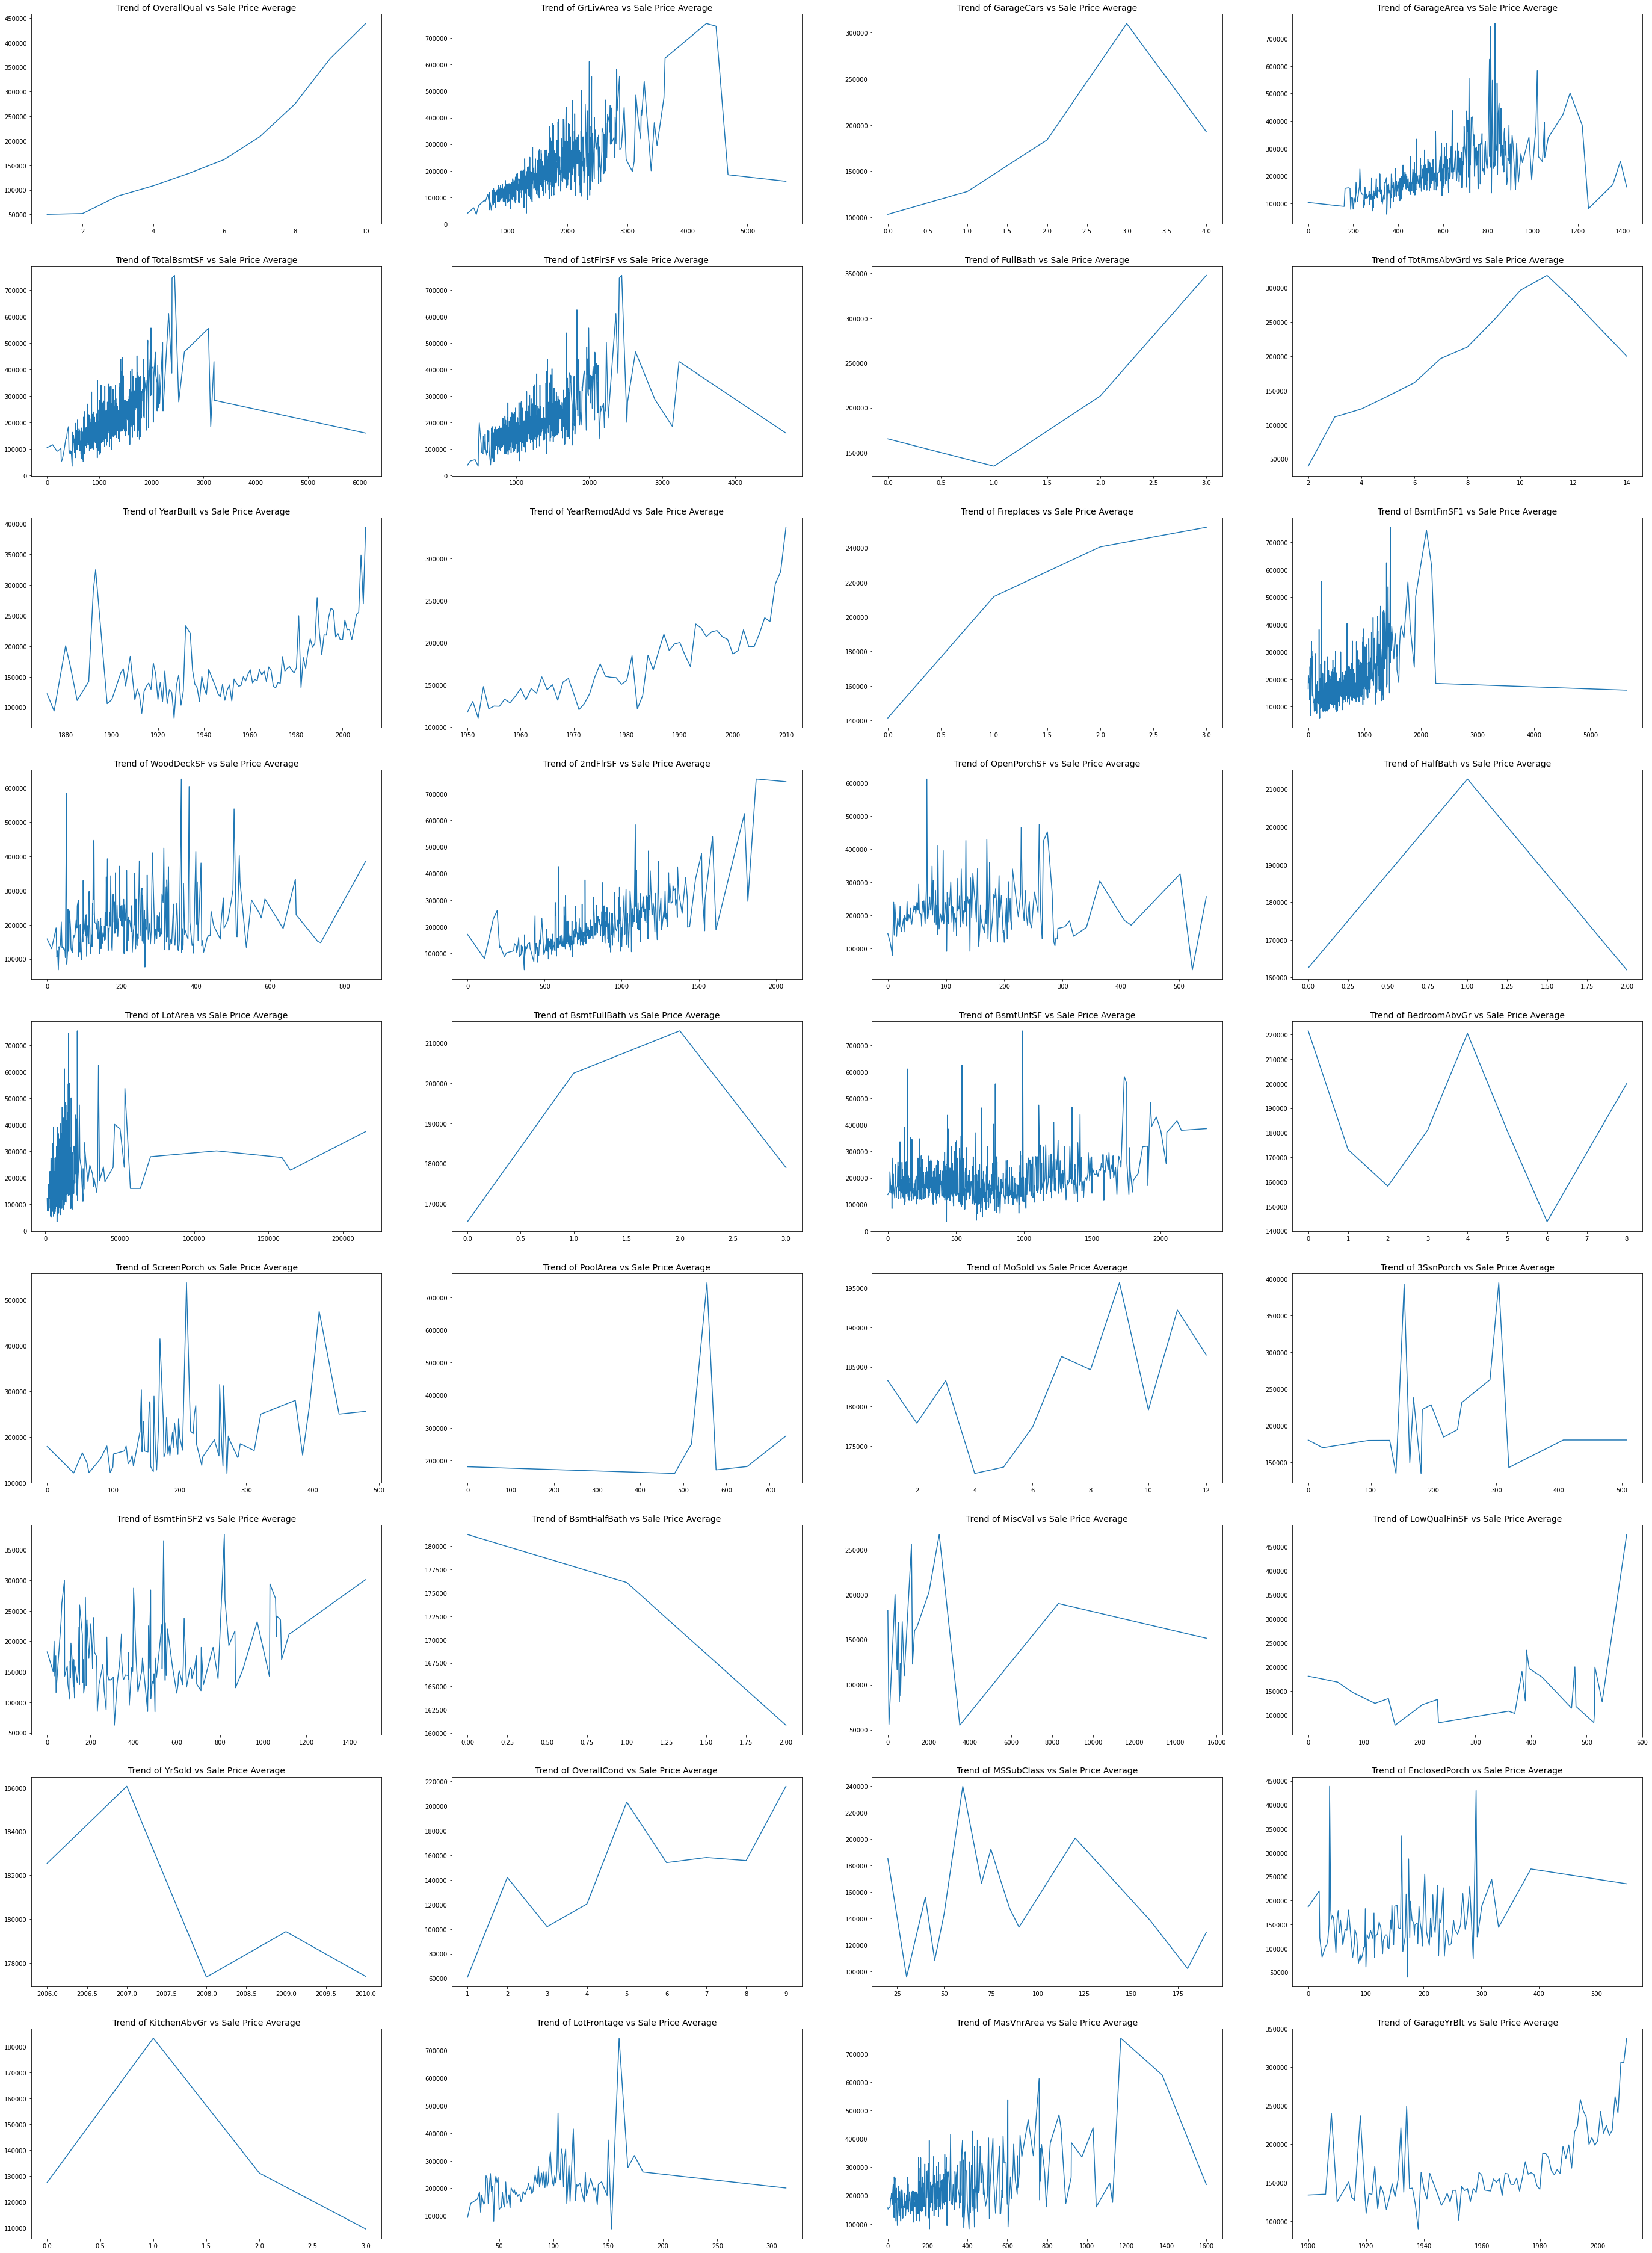

In [70]:
# Plot the trend of each numerical columns vs Sale Price sorted by its correlation with Sale Price
# Create the subplot grid
fig, ax = plt.subplots(9, 4, figsize=(48, 68))

# Loop through the numerical columns
for i, col in enumerate(corr_df.columns):
    trend = df[['SalePrice', col]].groupby([col]).mean().reset_index().sort_values(by=col)
    ax[i // 4][i % 4].plot(trend[col], trend['SalePrice'])
    ax[i // 4][i % 4].set_title(f'Trend of {col} vs Sale Price Average', fontsize=14)

plt.show()

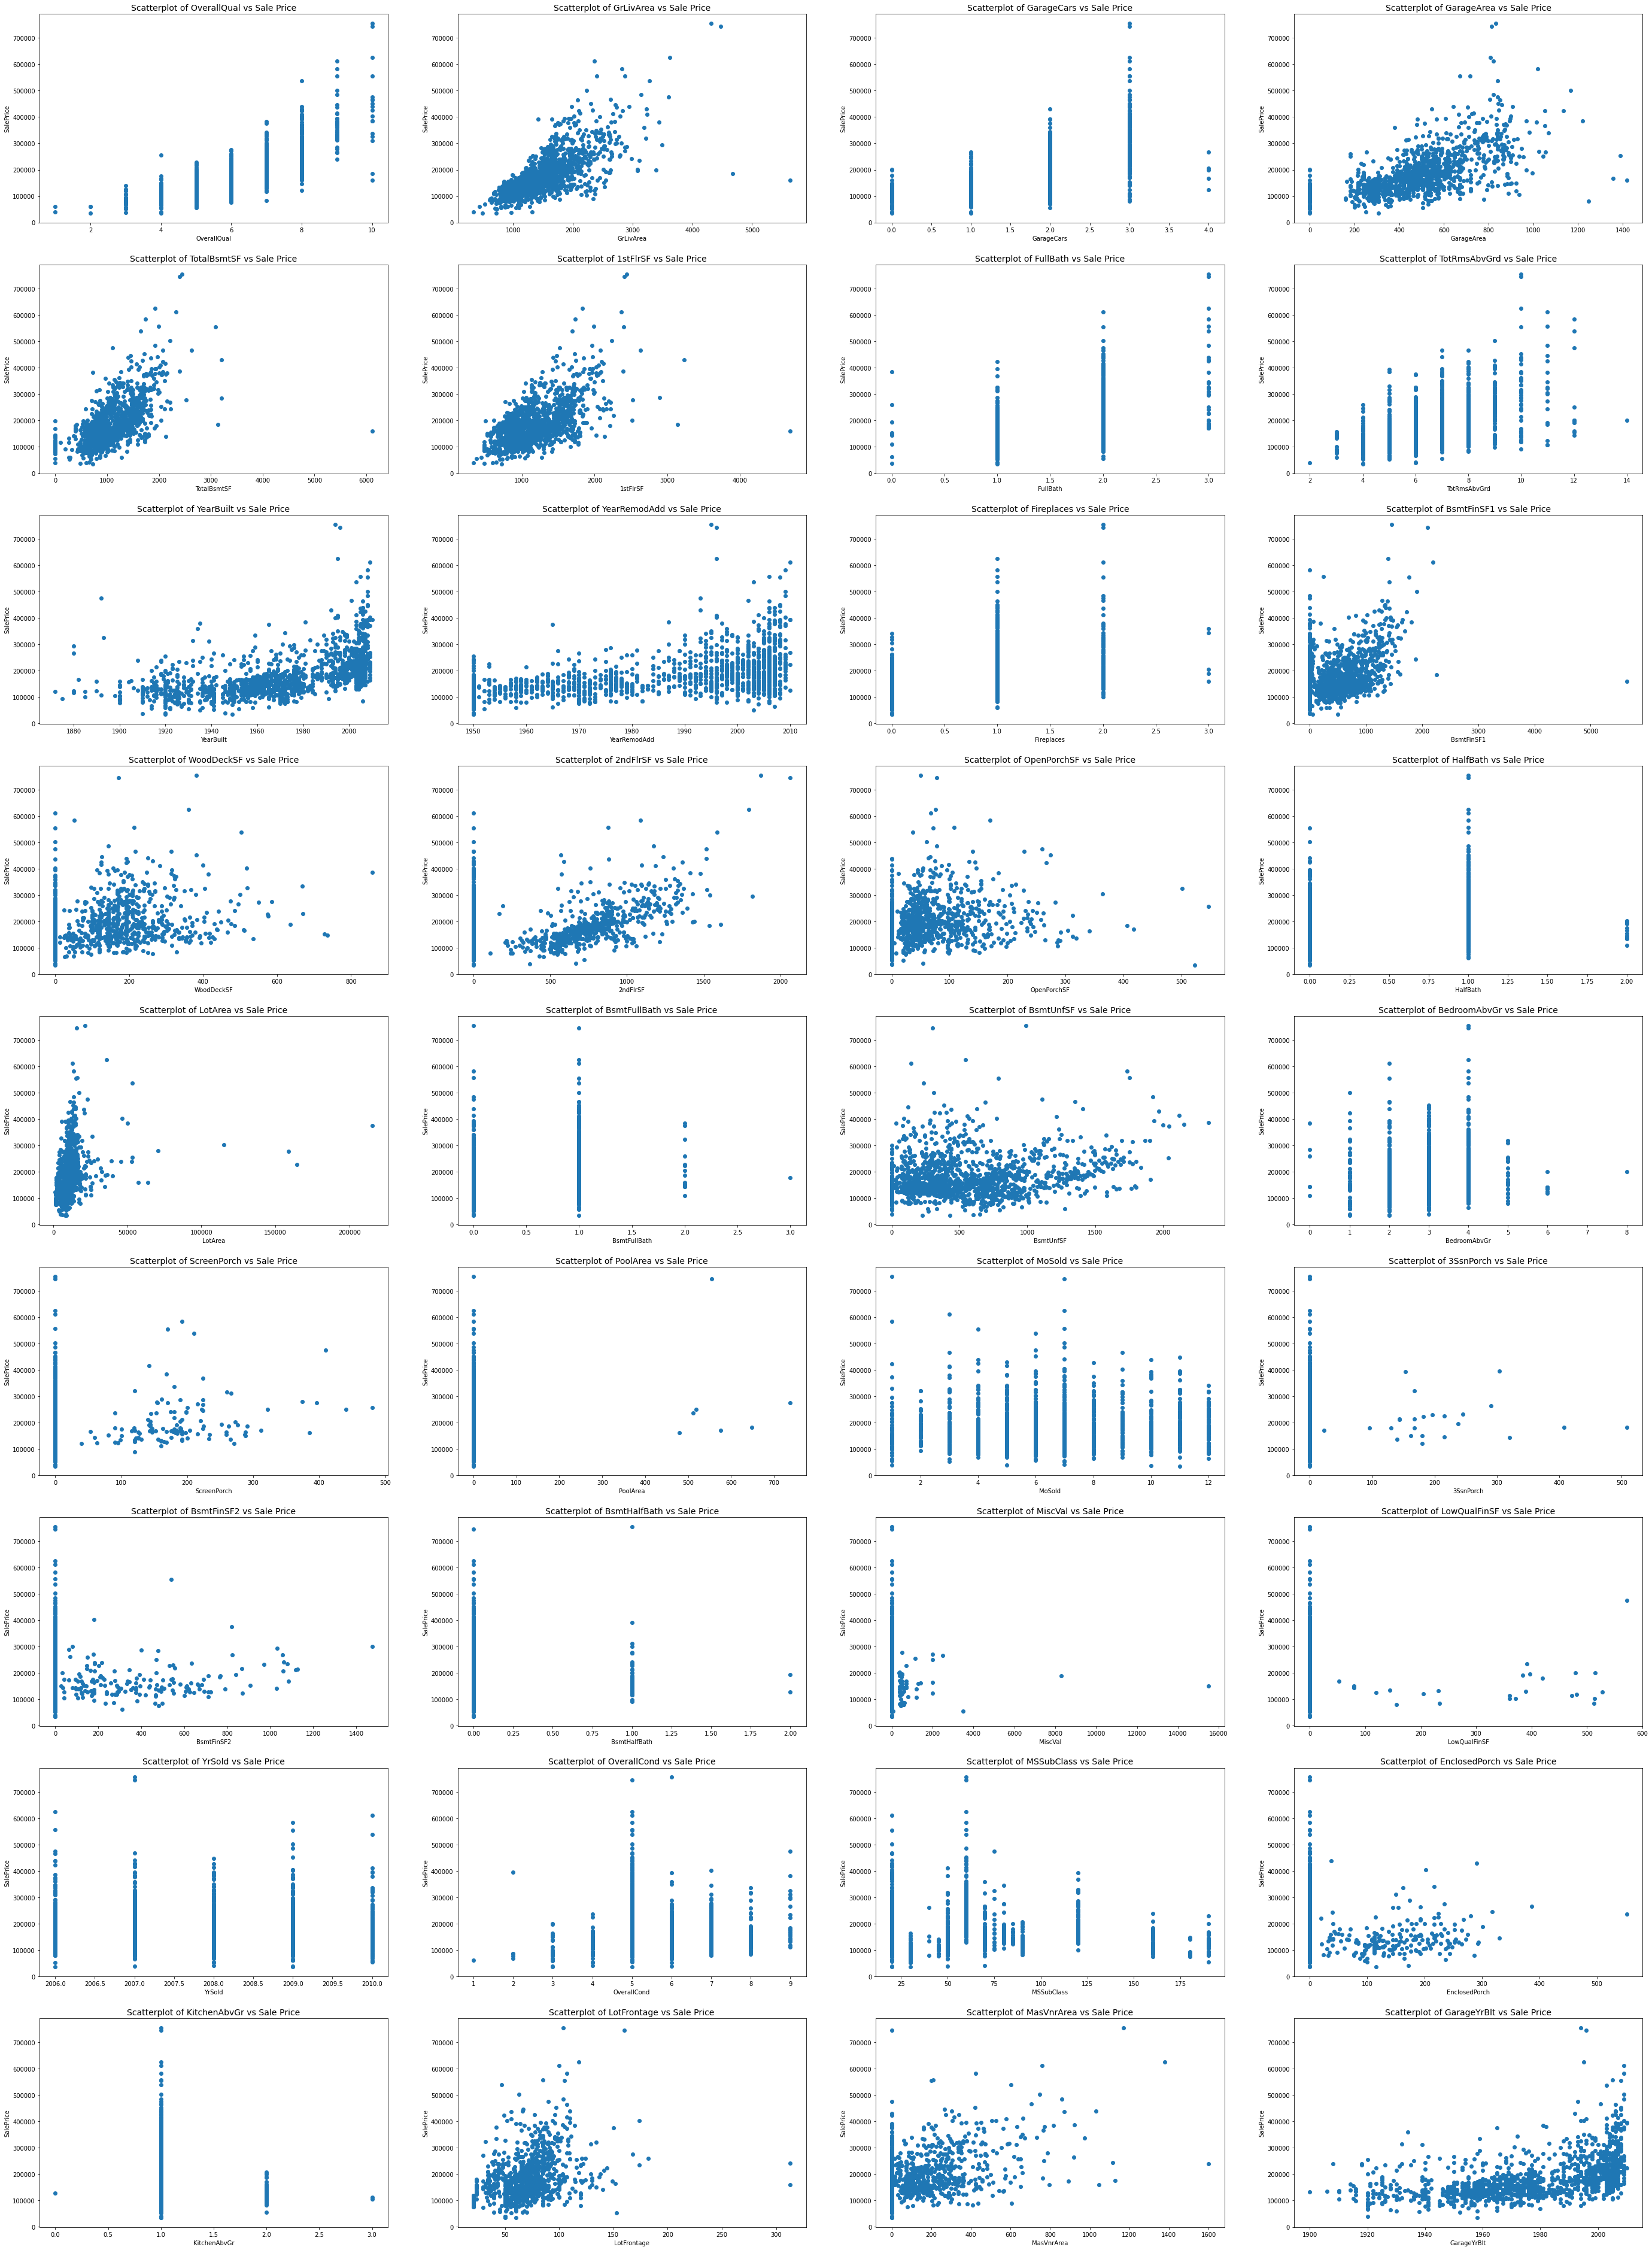

In [71]:
# Scatterplot for each numerical columns vs Sale Price
# Create the subplot grid
fig, ax = plt.subplots(9, 4, figsize=(48, 68))

# Loop through the numerical columns
for i, col in enumerate(corr_df.columns):
    ax[i // 4][i % 4].scatter(df[col], df['SalePrice'])
    ax[i // 4][i % 4].set_xlabel(col)
    ax[i // 4][i % 4].set_ylabel('SalePrice')
    ax[i // 4][i % 4].set_title(f'Scatterplot of {col} vs Sale Price', fontsize=14)

plt.show()

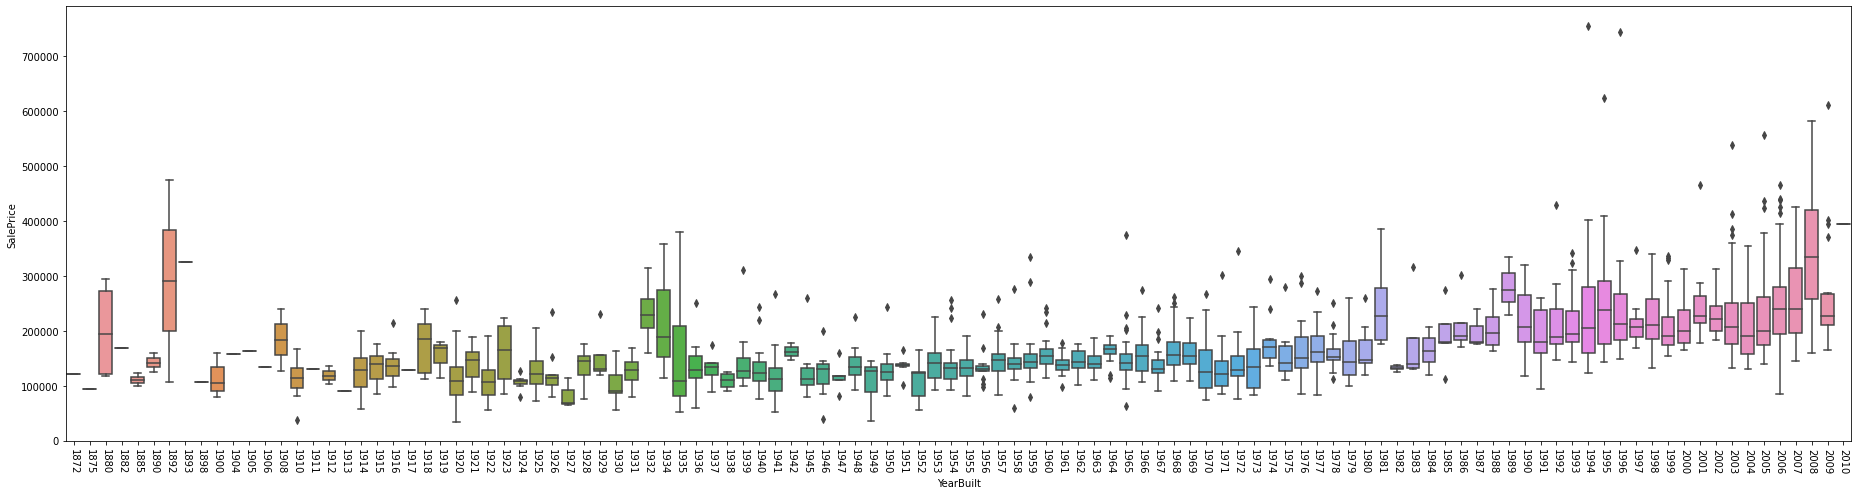

In [72]:
# Boxplot for Sale Price by Year Built
plt.figure(figsize=(32,8))
sns.boxplot(data=df, y="SalePrice", x="YearBuilt")
plt.xticks(rotation=270)
plt.show()

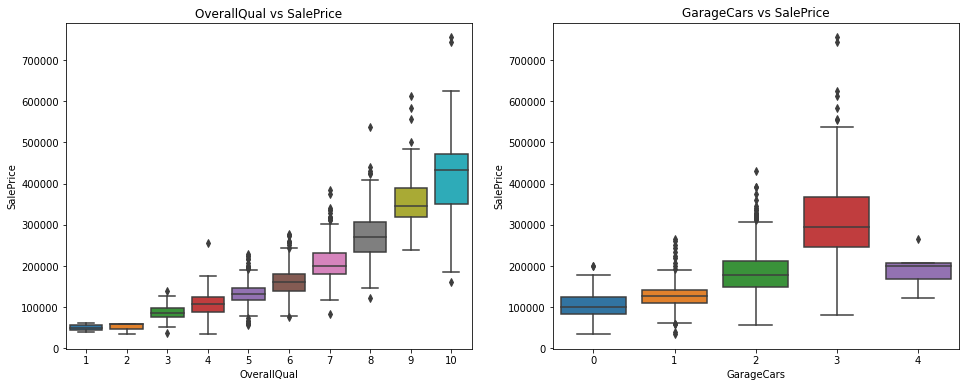

In [73]:
# From the heatmap it is known that the most positively 
# correlated features are OverallQual, GrLivArea, and GarageCars
# Examine boxplot for the aforementioned features

# Create grid
f, ax = plt.subplots(1, 2, figsize=(16,6))

# Create boxplot
sns.boxplot(data=df, y="SalePrice", x="OverallQual", ax=ax[0])
sns.boxplot(data=df, y="SalePrice", x="GarageCars", ax=ax[1])

ax[0].set_title("OverallQual vs SalePrice")
ax[1].set_title("GarageCars vs SalePrice")

plt.show()

In [74]:
# Examine GrLivArea
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [75]:
# Group GrLivArea into categories (low, medium, high)
GrLivAreaInterval = [df['GrLivArea'].min(), df['GrLivArea'].quantile(0.25), df['GrLivArea'].quantile(0.75), df['GrLivArea'].max()]
boxplot_df = df.copy()
boxplot_df['GrLivAreaInterval'] = pd.cut(boxplot_df['GrLivArea'], GrLivAreaInterval, labels=['Low', 'Medium', 'High'])
boxplot_df[['GrLivArea', 'GrLivAreaInterval']]

GrLivArea GrLivAreaInterval
0          1710            Medium
1          1262            Medium
2          1786              High
3          1717            Medium
4          2198              High
...         ...               ...
1455       1647            Medium
1456       2073              High
1457       2340              High
1458       1078               Low
1459       1256            Medium

[1460 rows x 2 columns]

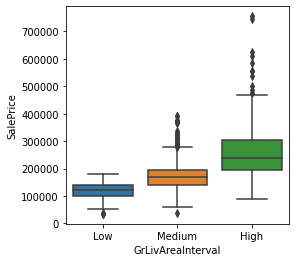

In [76]:
# Boxplot for GrLivArea Categories
plt.figure(figsize=(4,4))
sns.boxplot(data=boxplot_df, y="SalePrice", x="GrLivAreaInterval")
plt.show()

### Analyze Categorical Columns

In [77]:
cat_feat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

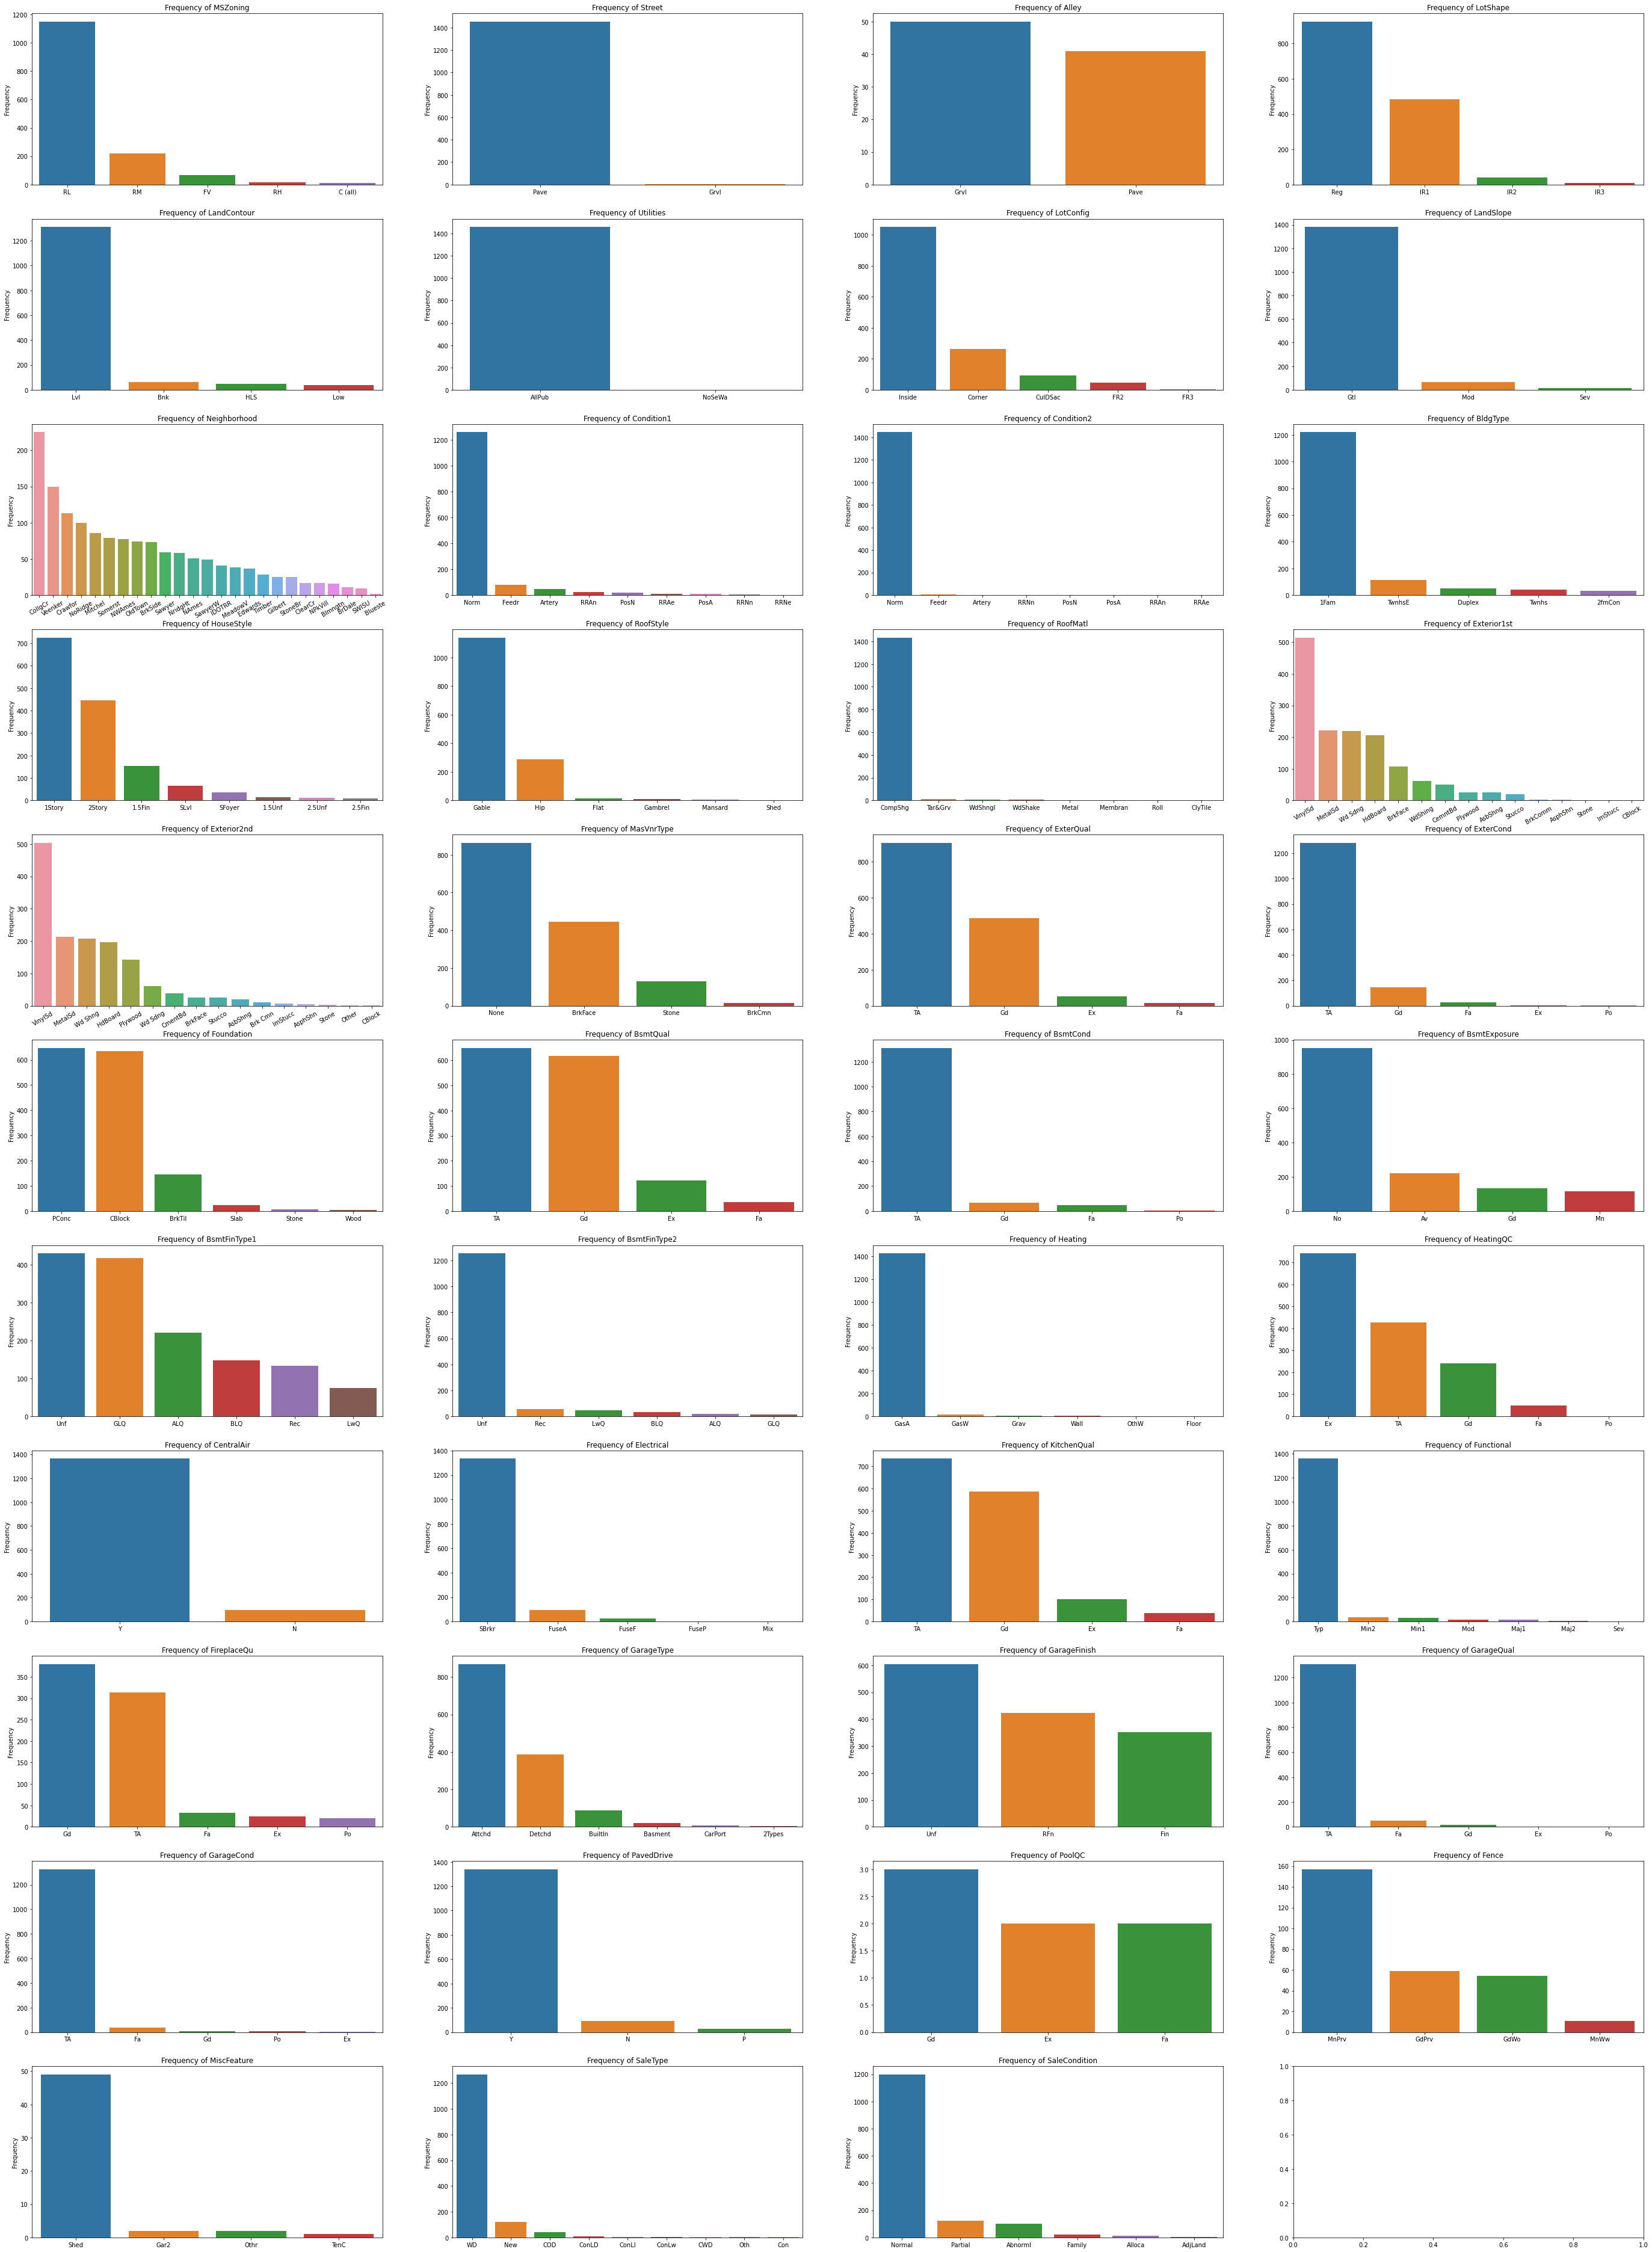

In [78]:
# Plot each Categorical Columns' frequency
# Create the subplot grid
fig, ax = plt.subplots(11, 4, figsize=(48, 68))

# Loop through the categorical columns
for i, col in enumerate(cat_feat.columns):
    # Create a catplot for the current column
    sns.countplot(x=col, data=df, ax=ax[i // 4][i % 4], order=df[col].value_counts().index)
    if col == "Neighborhood" or col == "Exterior1st" or col == "Exterior2nd":
        labels = df[col].unique().tolist()
        ax[i // 4][i % 4].set_xticklabels(rotation=30, labels=labels)
    ax[i // 4][i % 4].set_xlabel('')
    ax[i // 4][i % 4].set_ylabel('Frequency')
    ax[i // 4][i % 4].set_title(f'Frequency of {col}')

plt.show()

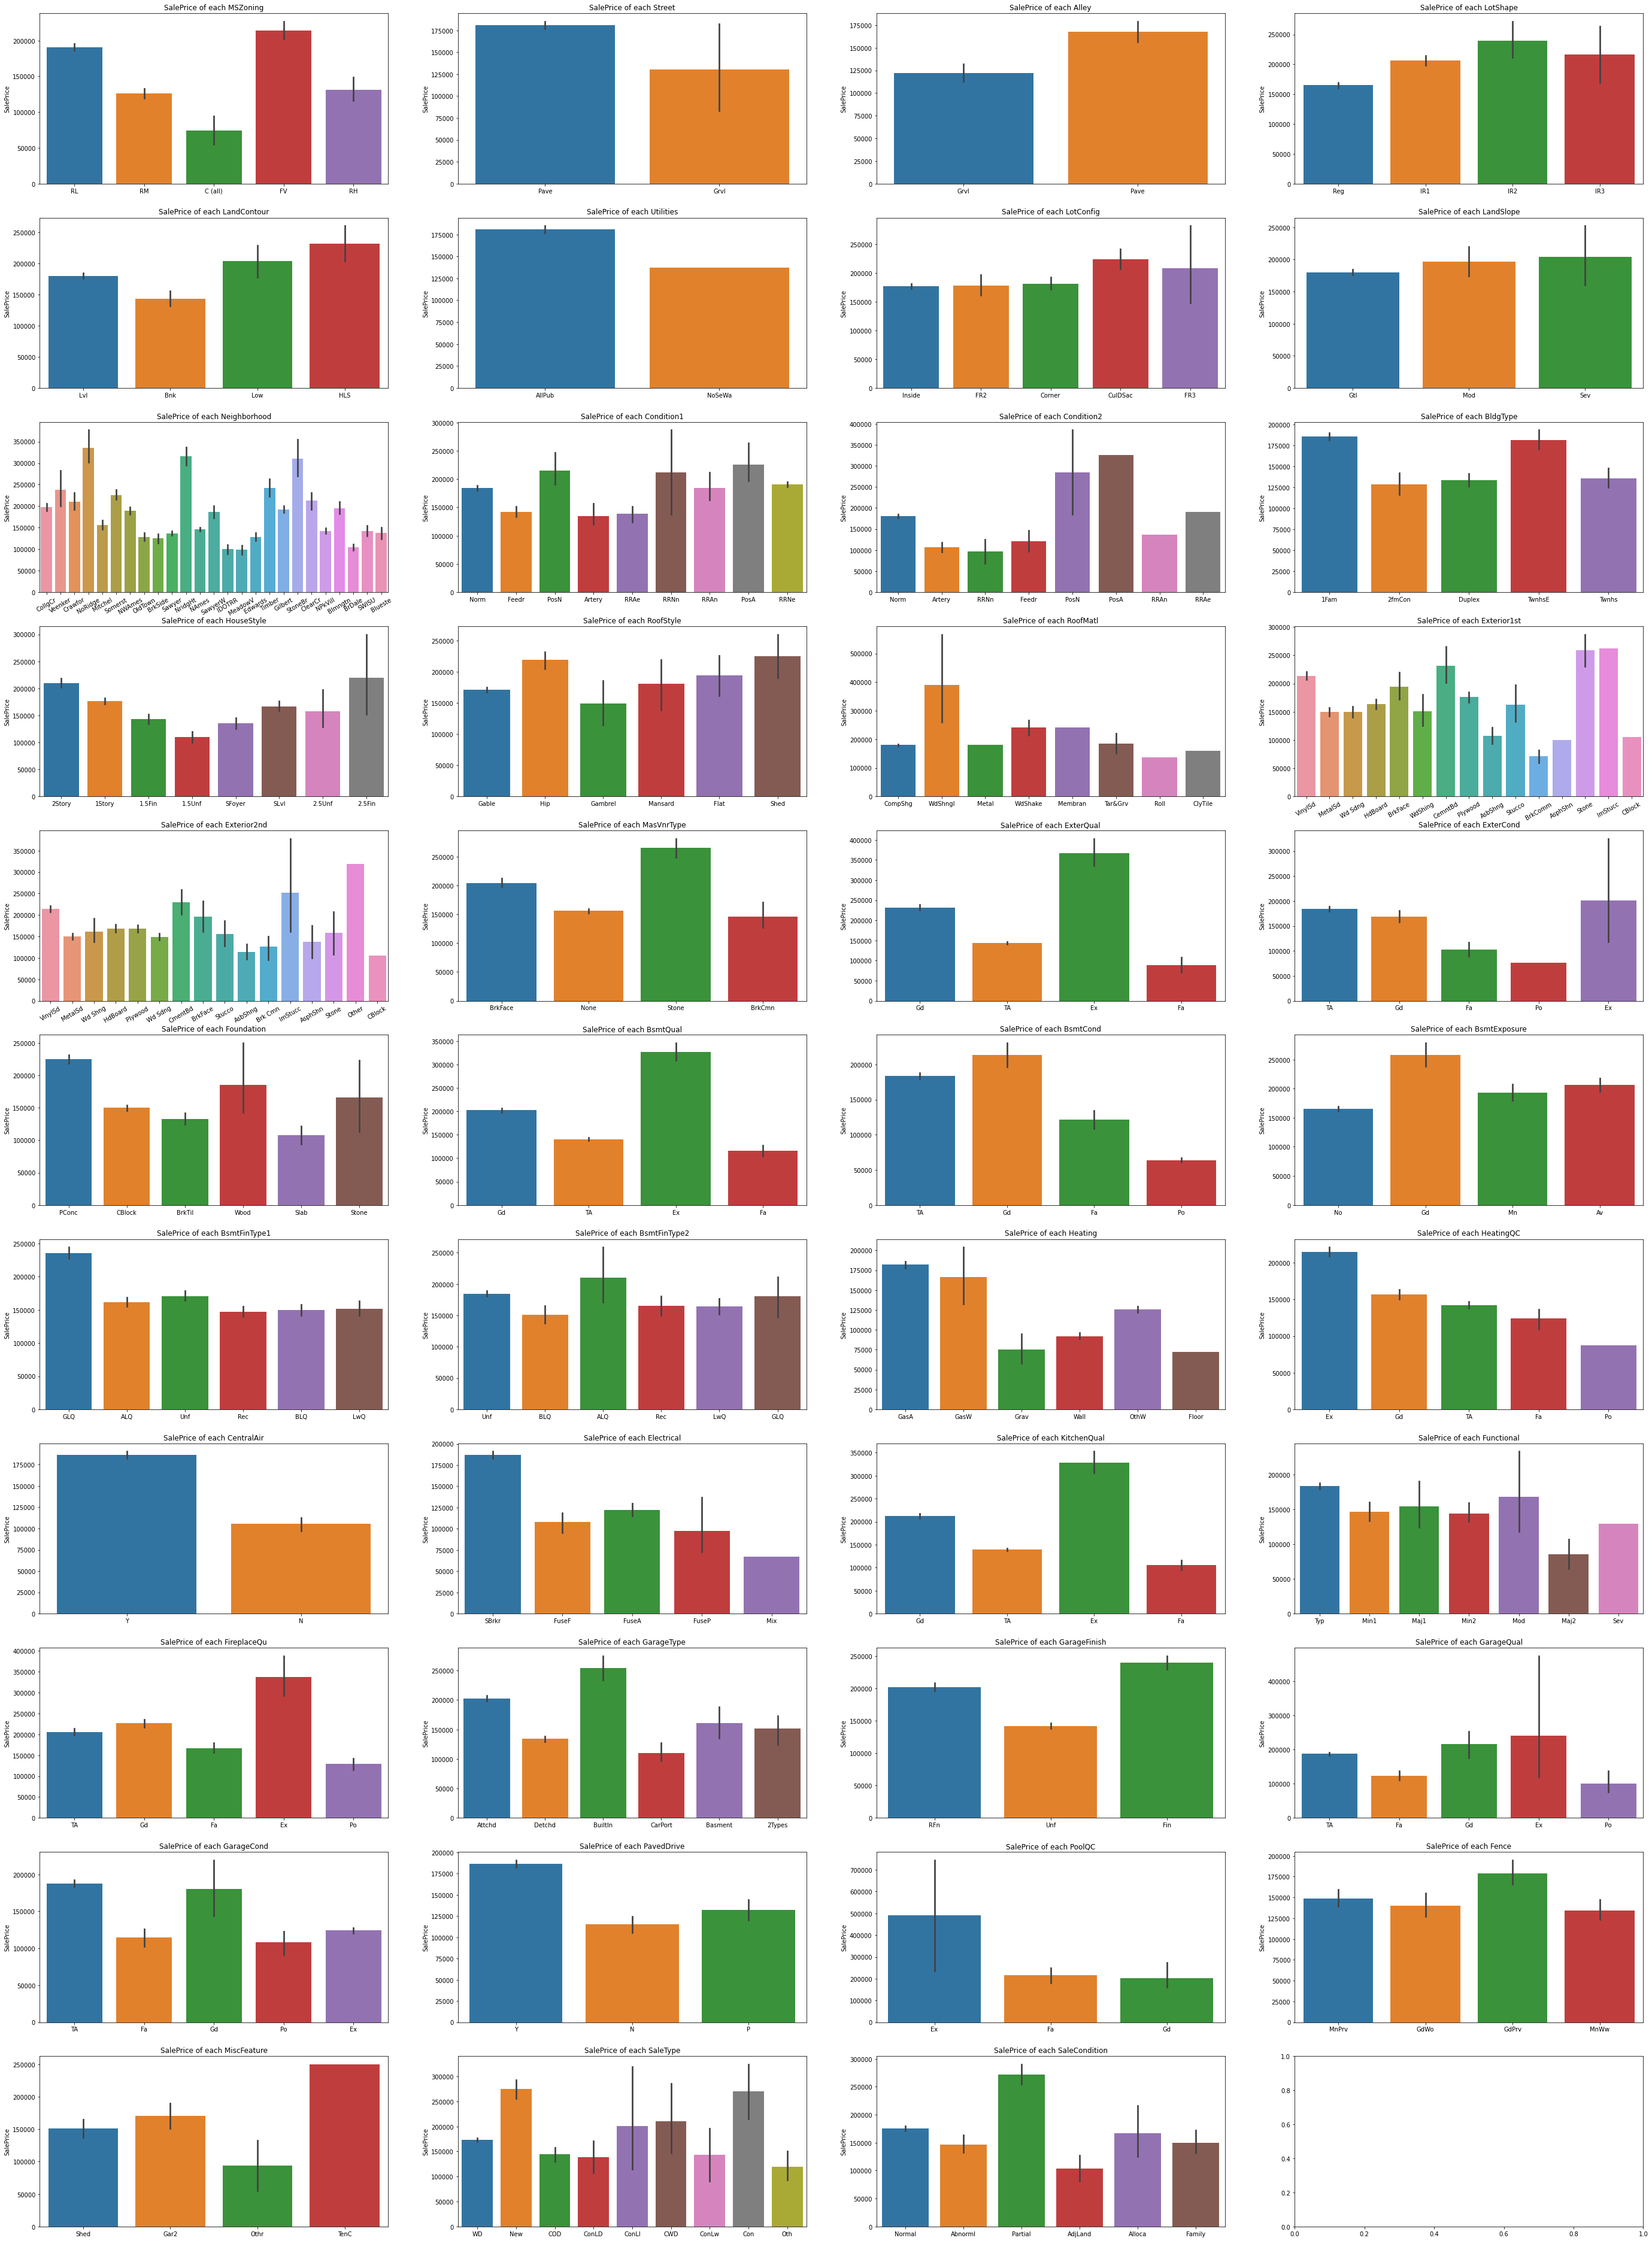

In [79]:
# Plot Sales Price vs each Categorical Columns
# Create the subplot grid
fig, ax = plt.subplots(11, 4, figsize=(48, 68))

# Loop through the categorical columns
for i, col in enumerate(cat_feat.columns):
    # Create a catplot for the current column
    sns.barplot(x=col, y='SalePrice', data=df, ax=ax[i // 4][i % 4])
    if col == "Neighborhood" or col == "Exterior1st" or col == "Exterior2nd":
        labels = df[col].unique().tolist()
        ax[i // 4][i % 4].set_xticklabels(rotation=30, labels=labels)
    ax[i // 4][i % 4].set_xlabel('')
    ax[i // 4][i % 4].set_ylabel('SalePrice')
    ax[i // 4][i % 4].set_title(f'SalePrice of each {col}')

plt.show()